<a href="https://colab.research.google.com/github/Ashishxyz/Sustainability-in-Finance/blob/main/Sustainability_In_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sustainabily in Finance** <br>
Sustainability in finance refers to the integration of environmental, social, and governance (ESG) factors into financial decision-making processes. It recognizes that economic activities should not only focus on short-term financial gains but also consider the long-term impact on the planet, society, and corporate governance. This approach aims to achieve a balance between economic growth, social progress, and environmental protection.

The concept of sustainability in finance has gained significant traction in recent years as people have become increasingly aware of the adverse effects of climate change, social inequality, and unethical business practices. By incorporating ESG considerations into financial practices, investors, businesses, and institutions can foster a more sustainable and responsible approach to economic activities.

**ESG Score** <br> Companies now started to calculate and release the ESG score every year.ESG (Environmental, Social, and Governance) scores are used to evaluate a company's performance and practices in relation to environmental sustainability, social responsibility, and corporate governance. These scores provide investors, stakeholders, and financial institutions with insights into a company's ESG practices and help assess its long-term sustainability and risk profile

## <center><b>Objective and Scope of the project</b></center><br>
The scope of this project is to investigate the potential correlation between a company's ESG performance and its profitability. We will collect ESG scores and financial data for some of the Fortune 500 companies, focusing on the profit/earning ratio as our metric of profitability. Using machine learning techniques, we aim to build a predictive model that can estimate a company's ESG score based on its financial metrics.

The objective of this project is to gain insights into how ESG factors might impact a company's profitability. By studying the relationship between ESG scores and the financial metrics, the aim is to provide meaningful insights for investors and stakeholders interested in sustainable investing. Additionally, this project will allow to deepen our understanding of machine learning concepts and their practical application in financial analysis.

## **Required Data Cleaning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel('Data.xlsx')
df.shape

(75, 8)

In [ ]:
df.head()

,Rank,Name,Symbol,revenue_ttm,price (USD),country,Market Capital,ESG Score(100)
0,1,Walmart,WMT,622021000000,155.53,United States,418.81,84.0
1,2,Saudi Aramco,2222.SR,588889174131,8.59,Saudi Arabia,2078.00,NaN
2,3,Amazon,AMZN,524897000000,125.49,United States,1287.00,81.0
3,4,Sinopec,600028.SS,484144248616,0.91,China,100.61,66.0
4,5,PetroChina,601857.SS,462943680870,1.05,China,184.91,62.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            75 non-null     int64  
 1   Name            75 non-null     object 
 2   Symbol          75 non-null     object 
 3   revenue_ttm     75 non-null     int64  
 4   price (USD)     75 non-null     float64
 5   country         75 non-null     object 
 6   Market Capital  73 non-null     float64
 7   ESG Score(100)  70 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 4.8+ KB


In [ ]:
df.isnull()

,Rank,Name,Symbol,revenue_ttm,price (USD),country,Market Capital,ESG Score(100)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
70,False,False,False,False,False,False,False,False
71,False,False,False,False,False,False,False,False
72,False,False,False,False,False,False,False,False
73,False,False,False,False,False,False,True,False


In [ ]:
pd.isnull(df).sum()

Rank              0
Name              0
Symbol            0
revenue_ttm       0
price (USD)       0
country           0
Market Capital    2
ESG Score(100)    5
dtype: int64

In [ ]:
#drop null values
df.dropna(inplace=True)

In [ ]:
df.shape

(68, 8)

In [ ]:
#understanding dropna function
data_test =[['madhav',11],['Gopi',15],['Keshav',],['latita',16]]
df_test = pd.DataFrame(data_test, columns=['Name','Age'])
df_test

,Name,Age
0,madhav,11.0
1,Gopi,15.0
2,Keshav,NaN
3,latita,16.0


In [ ]:
df_test.dropna()
# inplace is mainly used for saving

,Name,Age
0,madhav,11.0
1,Gopi,15.0
3,latita,16.0


In [ ]:
df.columns

Index(['Rank', 'Name', 'Symbol', 'revenue_ttm', 'price (USD)', 'country',
       'Market Capital', 'ESG Score(100)'],
      dtype='object')

In [ ]:
df.rename(columns = {'revenue_ttm' : 'revenue'},inplace=True)

In [ ]:
df.describe()

,Rank,revenue,price (USD),Market Capital,ESG Score(100)
count,68.000000,6.800000e+01,68.000000,68.000000,68.000000
mean,37.514706,2.073337e+11,99.394662,253.713088,73.735294
std,21.784215,1.097966e+11,125.071188,512.523349,13.883973
min,1.000000,1.092720e+11,0.660000,16.760000,30.000000
25%,18.750000,1.284627e+11,11.382500,46.852500,66.750000
50%,36.500000,1.605409e+11,47.550000,87.585000,78.000000
75%,57.250000,2.502330e+11,135.455000,190.162500,82.000000
max,75.000000,6.220210e+11,523.650000,2908.000000,94.000000


# **Exploratory Data Analysis**

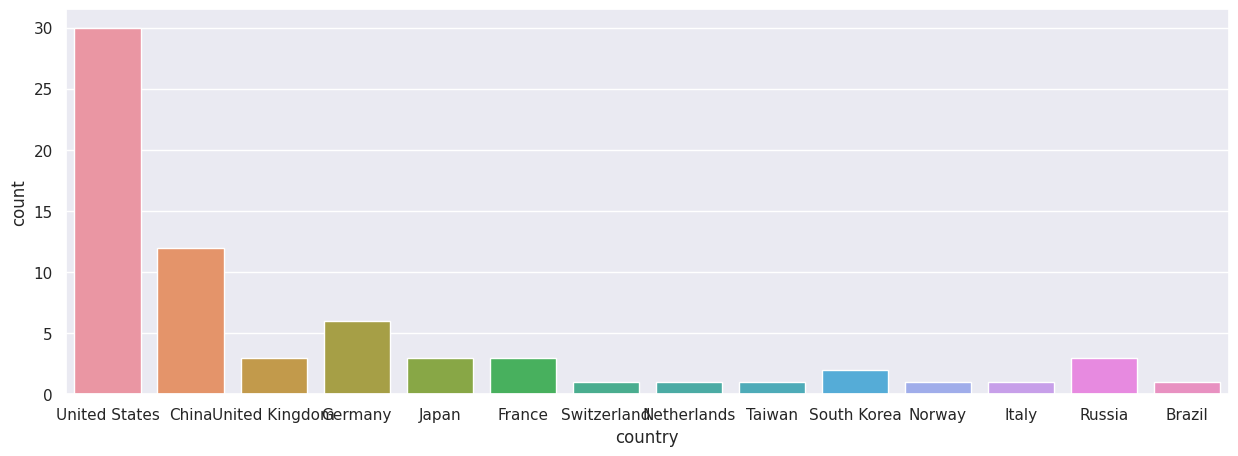

In [ ]:
ax=sns.countplot(x='country',data=df)

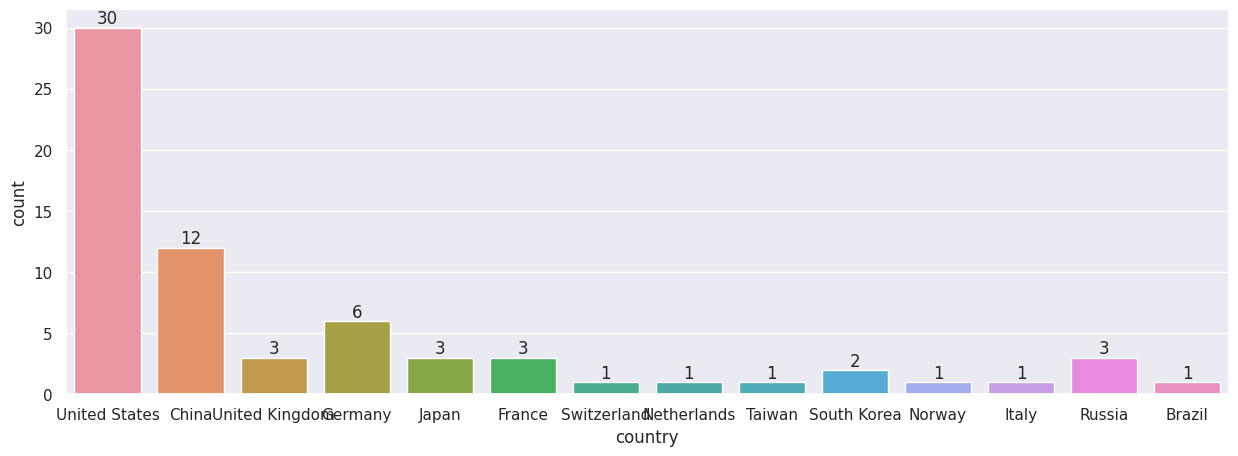

In [ ]:
ax=sns.countplot(x='country',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

In [ ]:
df.groupby(['country'],as_index=False)['revenue'].sum().sort_values(by='revenue',ascending = False)

,country,revenue
13,United States,6872234787000
1,China,2461273854499
3,Germany,1079414841500
12,United Kingdom,761673114544
5,Japan,556644923003
2,France,545933458982
8,Russia,373649788950
9,South Korea,331757700126
10,Switzerland,255984000000
6,Netherlands,223325518427


<Axes: xlabel='country', ylabel='revenue'>

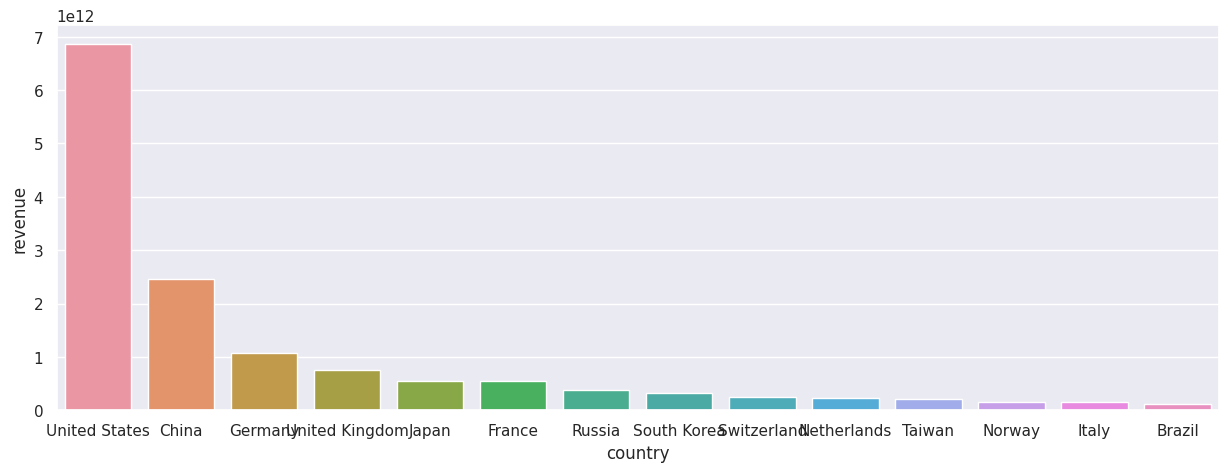

In [ ]:
coun_rev = df.groupby(['country'],as_index=False)['revenue'].sum().sort_values(by='revenue',ascending = False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='country',y = 'revenue',data=coun_rev)

***From the above analysis,it is cleared that most of the top companies are from USA. Hence, USA should strengthened their ESG norms and gives importance to ESG score of the project, so that their companies and other countries companies following them do the same.***

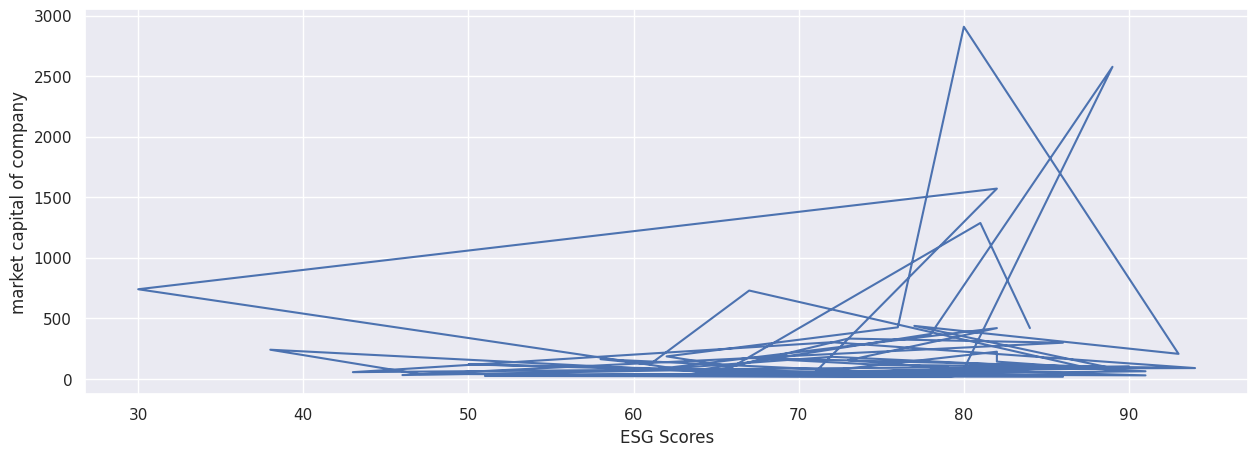

In [ ]:
ESG_Score=df['ESG Score(100)']
Market_cap=df['Market Capital']
plt.plot(ESG_Score,Market_cap)
plt.xlabel('ESG Scores')
plt.ylabel('market capital of company')
plt.show()


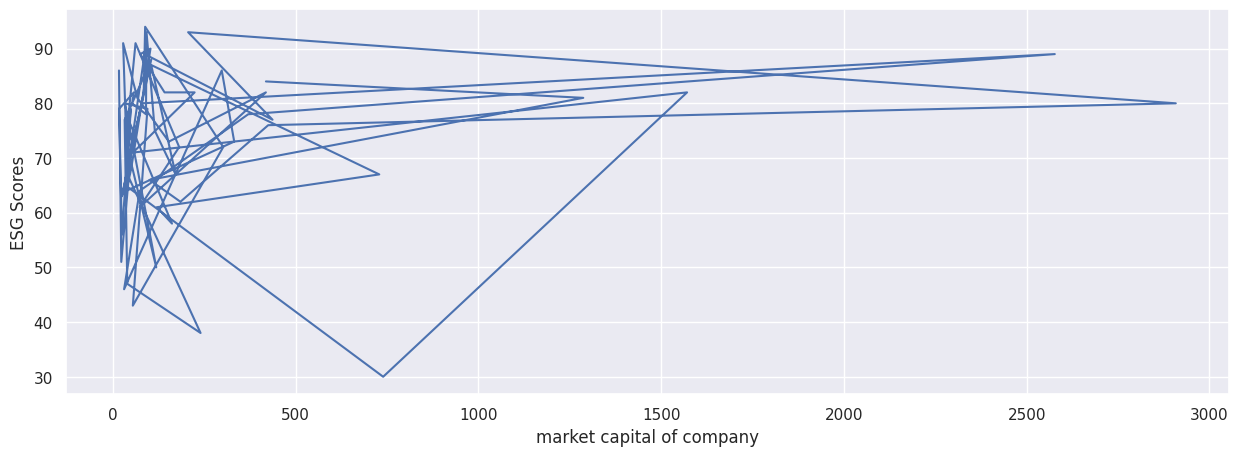

In [ ]:
ESG_Score=df['ESG Score(100)']
Market_cap=df['Market Capital']
plt.plot(Market_cap,ESG_Score)
plt.xlabel('market capital of company')
plt.ylabel('ESG Scores')
plt.show()

In [ ]:
import pandas as pd

# Read the data from the Excel file
data = pd.read_excel('Data.xlsx')

# Extract the market capital and ESG score columns
market_capital = data['Market Capital']
esg_score = data['ESG Score(100)']

# Calculate the correlation coefficient
correlation_coefficient = market_capital.corr(esg_score)

# Print the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)


Correlation Coefficient: 0.1139258003198515


### **The correlation coefficient is 0.1139, it indicates a weak positive correlation between the "Market Capital" and "ESG Score" variables.**

### **The correlation coefficient ranges between -1 and 1, where 1 represents a perfect positive correlation, -1 represents a perfect negative correlation, and 0 represents no correlation. A correlation coefficient of 0.11 suggests a positive relationship, but it is relatively weak.**

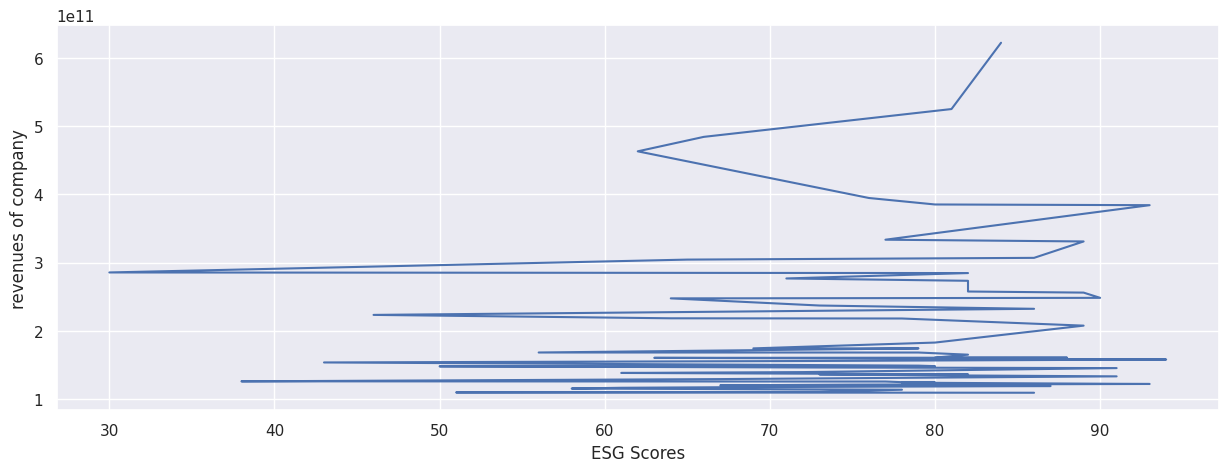

In [ ]:
ESG_Score=df['ESG Score(100)']
revenues=df['revenue']
plt.plot(ESG_Score,revenues)
plt.ylabel('revenues of company')
plt.xlabel('ESG Scores')
plt.show()

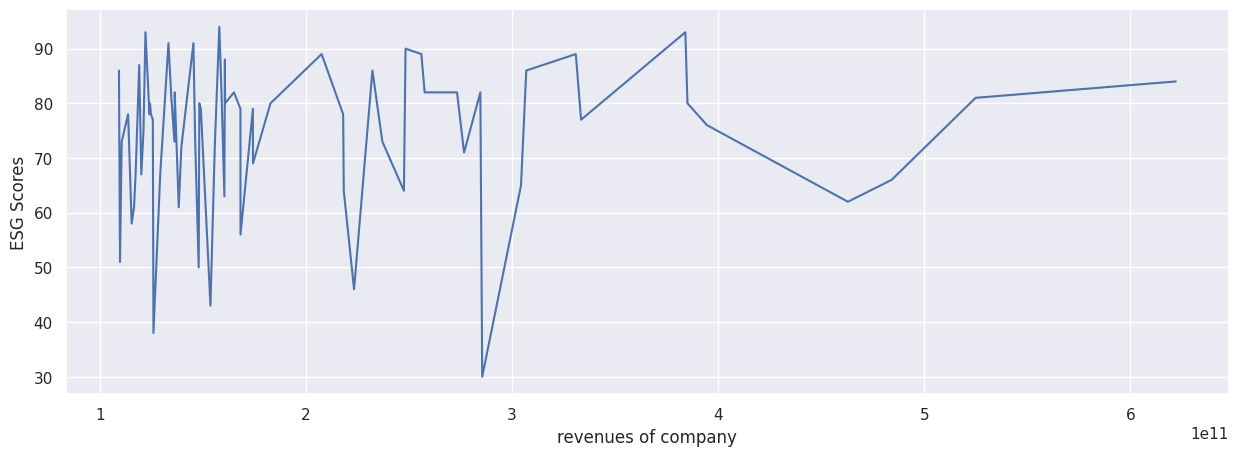

In [ ]:
ESG_Score=df['ESG Score(100)']
revenues=df['revenue']
plt.plot(revenues,ESG_Score)
plt.xlabel('revenues of company')
plt.ylabel('ESG Scores')
plt.show()

In [ ]:
import pandas as pd

# Read the data from the Excel file
data = pd.read_excel('Data.xlsx')

# Extract the market capital and ESG score columns
revenues1 = data['revenue_ttm']
esg_score = data['ESG Score(100)']

# Calculate the correlation coefficient
correlation_coefficient = revenues1.corr(esg_score)

# Print the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)


Correlation Coefficient: 0.11579442028385194


### ***From the above graph , it is clear that relationship between esg score and market capital or revenue is not perfectly linear as financial metric can be a parameter but esg score depend on many other factors.***

## **Feature Engineering**
## Feature Selection: Explore different feature selection techniques to identify the most relevant financial metrics for predicting ESG scores. This can help reduce noise and improve the model's performance.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Read the data from the dataset
data = pd.read_excel('Data.xlsx')

# Extract the features and target
X = data[['revenue_ttm', 'Market Capital']]
y = data['ESG Score(100)']

# Handle missing values
imputer = SimpleImputer()
X = imputer.fit_transform(X)

imputer = SimpleImputer()
y = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()

X = pd.DataFrame(X, columns=['Revenue_ttm', 'Market Capital'])


# Initialize the Random Forest model
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X, y)

# Get the feature importances
importance_scores = model.feature_importances_

# Print the feature importances
for i in range(len(X.columns)):
    print(f"Feature: {X.columns[i]}, Importance Score: {importance_scores[i]}")


Feature: Revenue_ttm, Importance Score: 0.47662046965448335
Feature: Market Capital, Importance Score: 0.5233795303455168


### In the context of the Random Forest model, the feature importance scores indicate the relative importance of each feature in predicting the target variable (ESG Score in this case).

In the output provided:

### Feature: Revenue_ttm (Trailing Twelve Months Revenue)
### Importance Score: 0.45802335506534525
### This indicates that the Revenue_ttm feature has an importance score of approximately 0.458. It suggests that this feature contributes to the prediction of the ESG Score, and it has a moderate level of importance compared to other features.

### Feature: Market Capital Importance Score: 0.5419766449346548
### This indicates that the Market Capital feature has an importance score of approximately 0.542. It suggests that this feature has a relatively higher importance in predicting the ESG Score compared to the Revenue_ttm feature.

## ***`Working on a new Data set(stocks related)2022`***

In [ ]:
df1 = pd.read_csv('Dataset.csv',encoding="ISO-8859-1")
df1.shape

(100, 14)

In [ ]:
df1.head

<bound method NDFrame.head of     Rank                       Company Symbol  \
0      1        Worthington Industries    WOR   
1      2  J.B. Hunt Transport Services   JBHT   
2      3              Verisk Analytics   VRSK   
3      4             Texas Instruments    TXN   
4      5                         Apple   AAPL   
..   ...                           ...    ...   
95    96                American Tower    AMT   
96    97                Arch Resources   ARCH   
97    98                           KBR    KBR   
98    99            Ormat Technologies    ORA   
99   100                  Hormel Foods    HRL   

                               Industry  ESG Score  Comp Rtg  RS Rtg  EPS Rtg  \
0           Metal-Processes/Fabrication      75.82        88      75       61   
1               Transportation-Trucking      73.09        93      64       95   
2   Commercial Services-Market Research      72.79        84      73       89   
3         Electronics-Semiconductor Mfg      72.63       

In [ ]:
df1.info

<bound method DataFrame.info of     Rank                       Company Symbol  \
0      1        Worthington Industries    WOR   
1      2  J.B. Hunt Transport Services   JBHT   
2      3              Verisk Analytics   VRSK   
3      4             Texas Instruments    TXN   
4      5                         Apple   AAPL   
..   ...                           ...    ...   
95    96                American Tower    AMT   
96    97                Arch Resources   ARCH   
97    98                           KBR    KBR   
98    99            Ormat Technologies    ORA   
99   100                  Hormel Foods    HRL   

                               Industry  ESG Score  Comp Rtg  RS Rtg  EPS Rtg  \
0           Metal-Processes/Fabrication      75.82        88      75       61   
1               Transportation-Trucking      73.09        93      64       95   
2   Commercial Services-Market Research      72.79        84      73       89   
3         Electronics-Semiconductor Mfg      72.63     

In [ ]:
df1.isnull()

,Rank,Company,Symbol,Industry,ESG Score,Comp Rtg,RS Rtg,EPS Rtg,SMR Rtg,3-Yr EPS Growth Rate,ROE,Last Qtr Sales % Chg,Last Qtr EPS % Chg,Div Yld
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#drop null values
df1.dropna(inplace=True)

In [ ]:
df1.shape

(100, 14)

In [ ]:
df1.columns

Index(['Rank', 'Company', 'Symbol', 'Industry', 'ESG Score', 'Comp Rtg',
       'RS Rtg', 'EPS Rtg', 'SMR Rtg', '3-Yr EPS Growth Rate', 'ROE',
       'Last Qtr Sales % Chg', 'Last Qtr EPS % Chg', 'Div Yld'],
      dtype='object')

In [ ]:
df1.describe()

,Rank,ESG Score,Comp Rtg,RS Rtg,EPS Rtg,ROE,Last Qtr Sales % Chg,Last Qtr EPS % Chg
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,65.943900,90.560000,81.910000,81.170000,49.280000,35.670000,156.480000
std,29.011492,3.183252,5.639543,12.414634,14.125738,142.581544,37.893006,376.470436
min,1.000000,61.430000,80.000000,47.000000,14.000000,-28.000000,-4.000000,-51.000000
25%,25.750000,63.440000,86.000000,73.000000,78.000000,12.000000,12.000000,6.750000
50%,50.500000,65.100000,91.000000,86.000000,82.500000,21.000000,20.000000,22.000000
75%,75.250000,67.792500,96.000000,91.000000,92.000000,34.250000,41.500000,77.500000
max,100.000000,75.820000,99.000000,99.000000,97.000000,1210.000000,182.000000,2600.000000


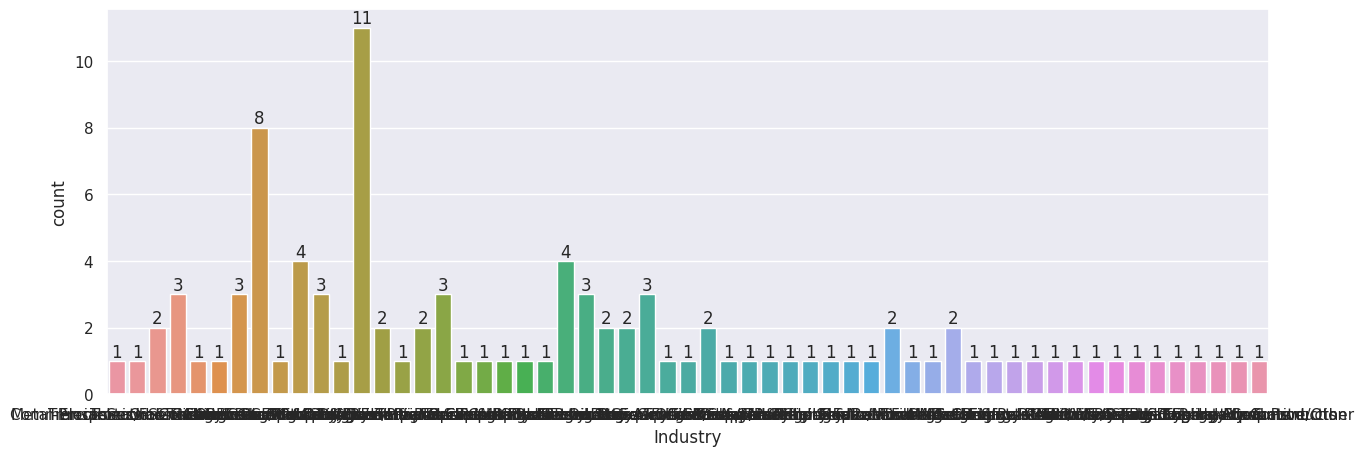

In [ ]:
ax1=sns.countplot(x='Industry',data=df1)
for bars in ax1.containers:
  ax1.bar_label(bars)

***Above graph shows that the data is collected from various types of industries.***

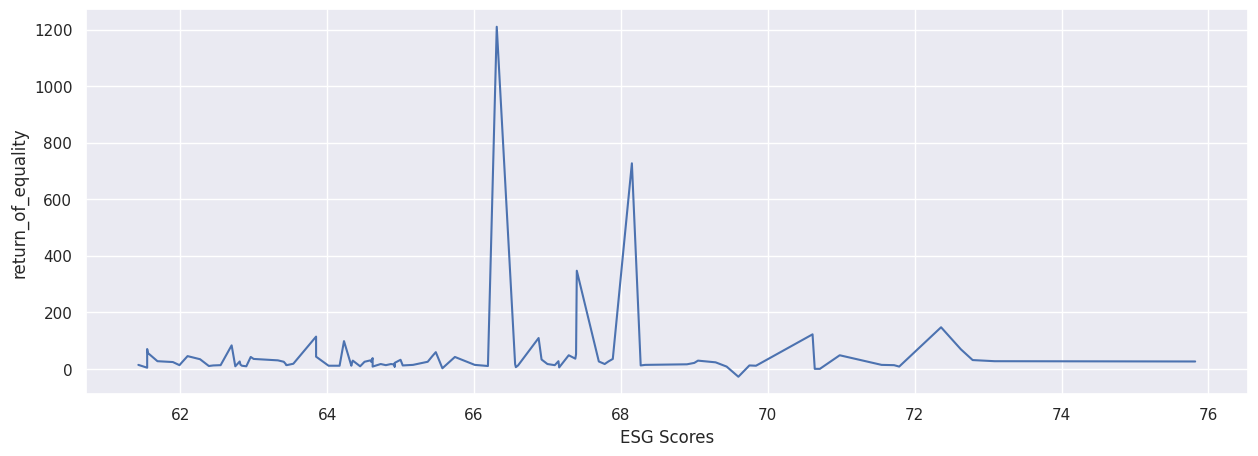

In [ ]:
ESGScore=df1['ESG Score']
return_of_equality=df1['ROE']
plt.plot(ESGScore,return_of_equality)
plt.xlabel('ESG Scores')
plt.ylabel('return_of_equality')
plt.show()


In [ ]:
import pandas as pd

# Read the data from the Excel file
data = pd.read_csv('Dataset.csv',encoding="ISO-8859-1")

# Extract the market capital and ESG score columns
return_of_equality = data['ROE']
esg_score = data['ESG Score']

# Calculate the correlation coefficient
correlation_coefficient = return_of_equality.corr(esg_score)

# Print the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)


Correlation Coefficient: 0.06794676481363933


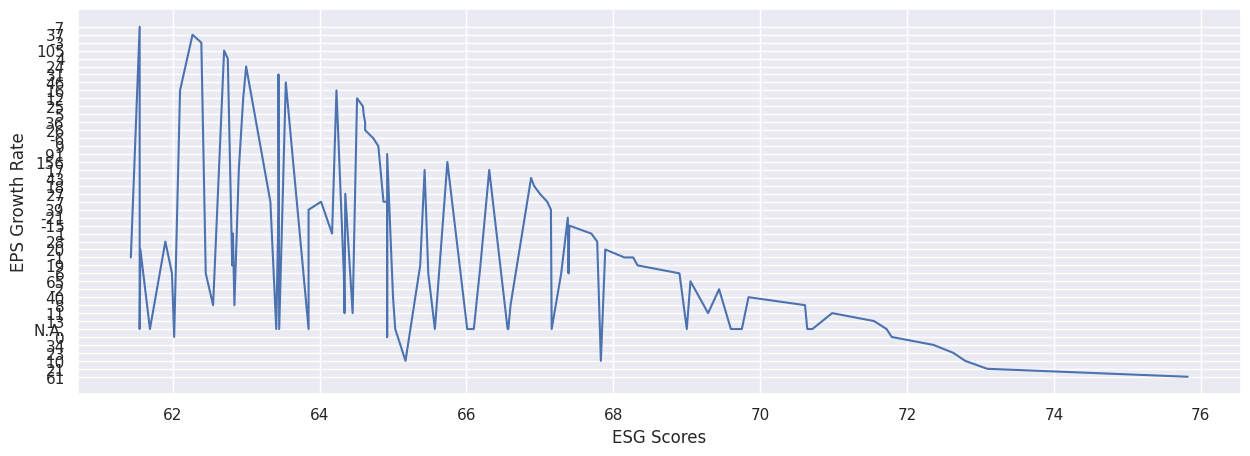

In [ ]:
ESGScore=df1['ESG Score']
EPS_Growth_Rate=df1['3-Yr EPS Growth Rate']
plt.plot(ESGScore,EPS_Growth_Rate)
plt.xlabel('ESG Scores')
plt.ylabel('EPS Growth Rate')
plt.show()

## **Working on a new Data set(stocks related)2021**

In [ ]:
df2 = pd.read_csv('2021Dataset.csv',encoding="ISO-8859-1")
df2.shape

(100, 14)

In [ ]:
df2.columns

Index(['ï»¿Rank', 'Company', 'Symbol', 'Industry', 'ESG Score', 'Comp Rtg',
       'RS Rtg', 'EPS Rtg', 'SMR Rtg', '3-Yr EPS Growth Rate', 'ROE',
       'Last Qtr Sales % Chg', 'Last Qtr EPS % Chg', 'Div Yld'],
      dtype='object')

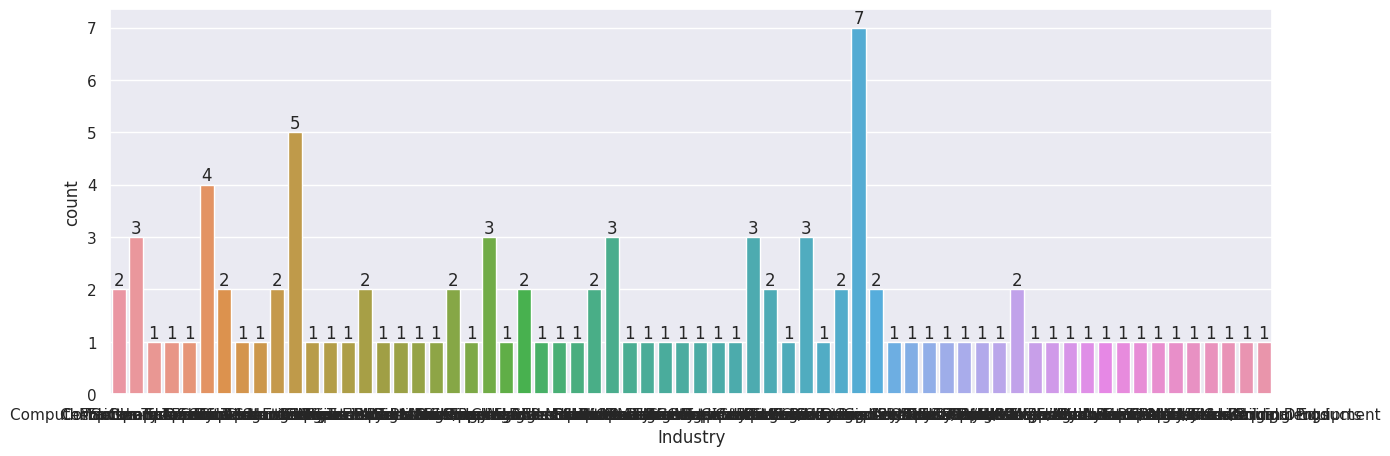

In [ ]:
ax2=sns.countplot(x='Industry',data=df2)
for bars in ax2.containers:
  ax2.bar_label(bars)

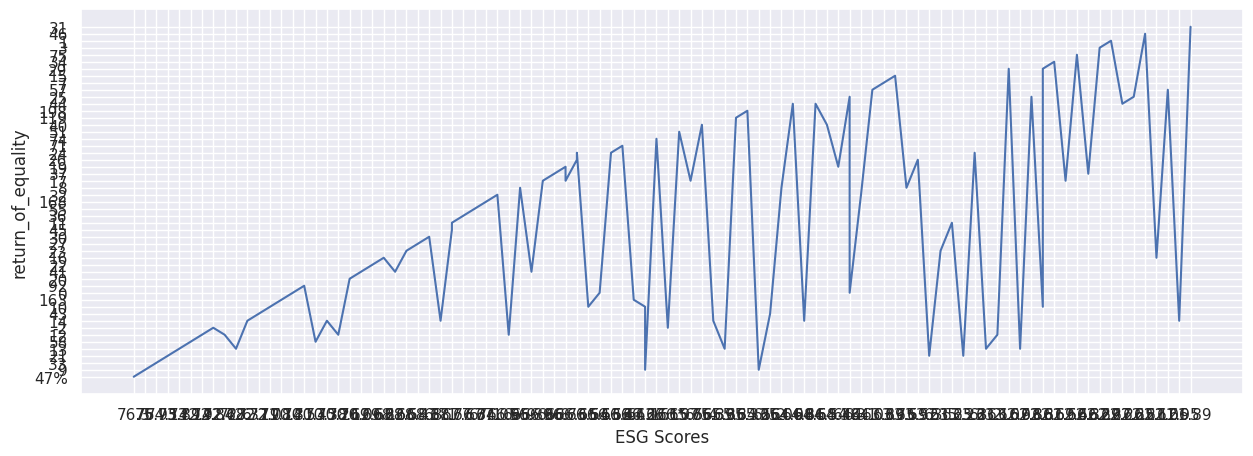

In [ ]:
ESGScore=df2['ESG Score']
return_of_equality=df2['ROE']
plt.plot(ESGScore,return_of_equality)
plt.xlabel('ESG Scores')
plt.ylabel('return_of_equality')
plt.show()

**Analysing the two years(2021 & 2022) esg vs roe graph , we can see in 2021 data is more scattered and dispersed which leads to the conclusion that some  high roe companies are having very low esg value but mainly with increase in esg values , roe also increases. In 2022 most of the high roe values are having esg values between 60-70.**

In [ ]:
dfm = pd.read_csv('Dataset2.csv',encoding="ISO-8859-1")
dfm.shape

(75, 14)

# **Linear Regression Model**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('Dataset2.csv')

# Prepare the input features (X) and target variable (y)
X = data['ROE'].values.reshape(-1, 1)  # Reshape to a 2D array
y = data['ESG Score'].values

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the ESG Score for a new 'roe' value
new_roe = 0.8  # Replace with the desired 'roe' value
predicted_esg = model.predict([[new_roe]])

print(f"The predicted ESG Score for roe={new_roe} is {predicted_esg[0]}")


The predicted ESG Score for roe=0.8 is 67.11418538521698


**Q) Predict the value of esg_score where the roe given is 16.**

In [ ]:
new_roe = 16
predicted_esg = model.predict([[new_roe]])

print(f"The predicted ESG Score for roe={new_roe} is {predicted_esg[0]}")

The predicted ESG Score for roe=16 is 67.11731833639563



In comparing the actual ESG Score value of 63.44 with the corresponding predicted value of 67.11, we observe a slight deviation between the two. While the trained linear regression model endeavors to capture the relationship between 'roe' and ESG Score, it's important to recognize that there are inherent complexities and additional factors at play that may influence the ESG Score beyond the 'roe' variable alone. Consequently, the predicted value of 67.11 should be interpreted as an estimation, providing valuable insights into the potential ESG performance associated with the given 'roe' value. It's worth noting that these variations between the actual and predicted values highlight the dynamic nature of ESG factors and the importance of considering a broader range of indicators when evaluating a company's overall ESG performance.

# **Random Forest Model**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('Dataset2.csv')

# Prepare the input features (X) and target variable (y)
X = data['ROE'].values.reshape(-1, 1)  # Reshape to a 2D array
y = data['ESG Score'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict the ESG Score for a new 'roe' value
new_roe = 0.8  # Replace with the desired 'roe' value
predicted_esg = model.predict([[new_roe]])

print(f"The predicted ESG Score for ROE={new_roe} is {predicted_esg[0]}")

# Evaluate the model performance using Mean Squared Error (MSE)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


The predicted ESG Score for ROE=0.8 is 66.17534999999992
Mean Squared Error: 15.692697807782007


In [ ]:
new_roe = 16
predicted_esg = model.predict([[new_roe]])

print(f"The predicted ESG Score for ROE={new_roe} is {predicted_esg[0]}")

The predicted ESG Score for ROE=16 is 67.73261499999994


# **Conclusion**
## In conclusion, this project explored the relationship between financial metrics and sustainability, employing data analysis techniques and machine learning algorithms. Through the analysis of a comprehensive dataset and the application of statistical measures, valuable insights were gained into the interplay between financial performance and sustainability practices. The project successfully demonstrated the potential for financial metrics to serve as indicators of sustainability performance.

## Findings from the project highlighted notable patterns and correlations between financial metrics and environmental, social, and governance (ESG) scores. This understanding has significant implications for sustainable finance, as it provides a framework for integrating sustainability considerations into investment decision-making. By leveraging financial data, investors and stakeholders can make more informed choices, aligning their investments with sustainable practices.

# **Social Impact**
## The social impact of this project lies in promoting responsible investing and sustainable practices within the finance industry. By highlighting the connection between financial metrics and sustainability, the project raises awareness among investors and encourages them to consider ESG factors when making investment decisions. This shift towards sustainable finance can drive positive change by directing investments towards companies with strong ESG performance, thereby incentivizing businesses to adopt sustainable practices.

## Moreover, by integrating sustainability principles into financial operations, companies can positively impact society by contributing to environmental conservation, promoting social welfare, and ensuring good governance practices. The project's findings reinforce the importance of sustainability as a core consideration for businesses, investors, and policymakers, ultimately fostering a more sustainable and equitable future.

# **Other Impacts:**

## Beyond the social impact, the project has several other implications. It contributes to the advancement of research in sustainable finance and strengthens the understanding of the relationship between financial performance and sustainability. The insights gained from this project can serve as a foundation for further research and exploration in the field, paving the way for more sophisticated models and analyses.

## Overall, this project bridges the gap between finance and sustainability, offering a comprehensive analysis of the relationship between financial metrics and sustainability performance. The project's findings and methodologies can serve as a basis for future studies, enabling stakeholders to make informed decisions and contribute to a more sustainable and socially responsible financial landscape.